# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.064039e+01     8.600352e+00
 * time: 0.002241849899291992
     1     2.796514e+01     4.879003e+00
 * time: 0.008690834045410156
     2     1.910393e+01     3.622389e+00
 * time: 0.01645183563232422
     3     1.235256e+01     2.626758e+00
 * time: 0.02215886116027832
     4     1.116854e+01     1.999030e+00
 * time: 0.025954008102416992
     5     1.016429e+01     1.439633e+00
 * time: 0.030028820037841797
     6     9.659584e+00     9.934998e-01
 * time: 0.03490090370178223
     7     9.179161e+00     1.065139e+00
 * time: 0.04001784324645996
     8     8.768828e+00     6.255673e-01
 * time: 0.04477381706237793
     9     8.507042e+00     5.647960e-01
 * time: 0.05003190040588379
    10     8.375106e+00     4.306568e-01
 * time: 0.05553698539733887
    11     8.341125e+00     7.141758e-01
 * time: 0.05970191955566406
    12     8.323717e+00     7.067948e-01
 * time: 0.06396293640136719
    13     8.293476e+00     6.425012e-01
 * t

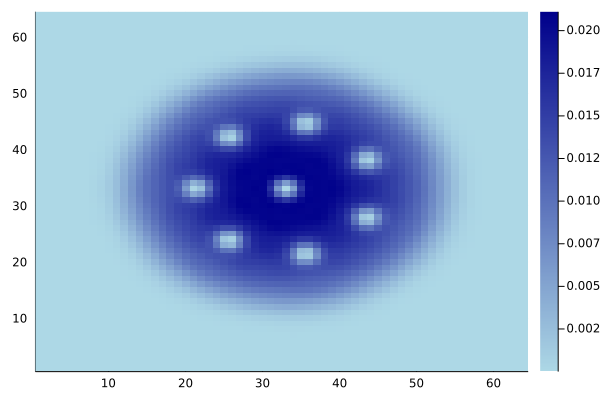

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)